# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [99]:
# Import the required libraries and dependencies
import os
import numpy as np
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [100]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

False

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [101]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [102]:
# The monthly amount for the member's household income
monthly_income = 12000



#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [103]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [104]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get('https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd')

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
btc_data = btc_response.json()
print(json.dumps(btc_data, indent=4, sort_keys=True))


{
    "bitcoin": {
        "usd": 21141
    }
}


In [105]:
# Using the Python requests library, make an API call to access the curreeth_response = requests.get(
eth_response = requests.get('https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd')
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
eth_data = eth_response.json()
print(json.dumps(eth_data, indent=4, sort_keys=True))


{
    "ethereum": {
        "usd": 1551.13
    }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [106]:
#Navigate the BTC response object to access the current price of BTC
btc_price = btc_data.get("bitcoin", {}).get("usd")
if btc_price:
    print(f'Current Bitcoin price in USD is: {btc_price}')
else:
    print("An error occurred while trying to retrieve the Bitcoin price. Please check the structure of the data and the keys used")

Current Bitcoin price in USD is: 21141


In [107]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_data.get("ethereum", {}).get("usd")
if eth_price:
    print(f'Current Ethereum price in USD is: {eth_price}')
else:
    print("An error occurred while trying to retrieve the Ethereum price. Please check the structure of the data and the keys used")

Current Ethereum price in USD is: 1551.13


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [108]:
# Compute the current value of the BTC holding 
btc_holding = 2.5
btc_value = btc_price * btc_holding

# Print current value of your holding in BTC
print(btc_value)




52852.5


In [109]:
# Compute the current value of the ETH holding 
eth_holding = 5
eth_value = eth_price * eth_holding

# Print current value of your holding in ETH
print(eth_value)


7755.650000000001


In [110]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


60608.15


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [111]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [112]:
# Set the variable for the Alpaca API and secret keys
api_key = 'PKKSSO3CRO5ONQ0KGDEA'
secret_key = '1mxg9UV90cSElwh4diTIy2hivW5uQbt66CwKSK3t'

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(api_key, secret_key, base_url='https://paper-api.alpaca.markets')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [113]:
# Set the tickers for both the bond and stock portion of the portfolio
# Set the tickers for both the bond and stock portion of the portfolio
stock_ticker = ["SPY"]
bond_ticker = ["AGG"]

# Set timeframe to 1Day
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
now = datetime.now(pytz.timezone('US/Eastern'))
weekday = now.weekday()
if weekday==0:
    prev_day = now - timedelta(days=3)
else:
    prev_day = now - timedelta(days=1)

start_date = prev_day.date().isoformat()
end_date = prev_day.date().isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [114]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
stock_df = pd.DataFrame(api.get_bars(stock_ticker, timeframe, start_date, end_date).df)
bond_df = pd.DataFrame(api.get_bars(bond_ticker, timeframe, start_date, end_date).df)

# Reorganize the DataFrame
# Separate ticker data
stock_df = stock_df.rename(columns={'close':'stock_close'})
bond_df = bond_df.rename(columns={'close':'bond_close'})

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([stock_df, bond_df], axis=1)

# Review the first 5 rows of the Alpaca DataFrame
portfolio_df.head()



,open,high,low,stock_close,volume,trade_count,vwap,symbol,open,high,low,bond_close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,,,,,,,,
2023-01-18 05:00:00+00:00,399.01,400.12,391.28,391.49,99632262,642981,394.554102,SPY,100.76,100.875,100.37,100.73,7779524,26693,100.664398,AGG


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [115]:
#Access the closing price for AGG from the Alpaca DataFrame
#Converting the value to a floating point number
if 'AGG' in portfolio_df['symbol'].values:
    agg_close_price = float(portfolio_df.at[portfolio_df.index[0], "bond_close"])
    print(f"The closing price for AGG stock is: ${agg_close_price}.")
else:
    print("AGG is not present in the symbols.")



The closing price for AGG stock is: $100.73.


In [116]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
if 'SPY' in portfolio_df['symbol'].values:
    spy_close_price = float(portfolio_df.at[portfolio_df.index[0], "stock_close"])
    print(f"The closing price for SPY stock is: ${spy_close_price}.")
else:
    print("SPY is not present in the symbols.")


The closing price for SPY stock is: $391.49.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [117]:
# Calculate the current value of the bond portion of the portfolio
bond_holding = 200
agg_value = bond_holding * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


20146.0


In [118]:
# Calculate the current value of the stock portion of the portfolio
stock_holding = 110
spy_value = stock_holding * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


43063.9


In [119]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


63209.9


In [120]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)


123818.05


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [121]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[60608.15, 63209.9]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [122]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['Total Savings'])

# Display the savings_df DataFrame
print(savings_df)



   Total Savings
0       60608.15
1       63209.90


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

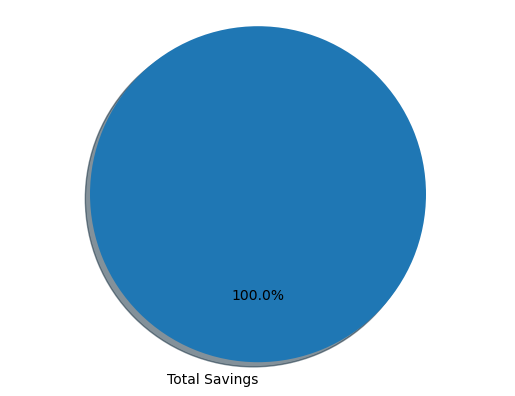

In [123]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
labels = savings_df.columns.tolist()
sizes = savings_df.values.tolist()[0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [124]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

print(emergency_fund_value)



36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [125]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio >= emergency_fund_value:
    print("You have enough savings to create an emergency fund.")
elif total_portfolio >= (emergency_fund_value * 0.5):
    print("You are half-way there. Keep saving.")
else:
    print("You do not have enough savings to create an emergency fund. Consider increasing your savings.")



You have enough savings to create an emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [126]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

print(start_date)
print(end_date)

2020-01-20 14:32:14.805976
2023-01-19 14:32:14.805976


In [ ]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# Retrieve the historical bars for the specified symbol and timeframe
# Convert the start_date and end_date strings to datetime objects
stock_df = api.get_bars('SPY',timeframe,start=start_date,end=end_date).df
bond_df = api.get_bars('AGG',timeframe,start=start_date,end=end_date).df

# Print the first 5 rows of the DataFrame
print(stock_df.shape)
print(bond_df.shape)





#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# Configure the Monte Carlo simulation

num_sims = 500
num_years = 30

# Use the mean and std of returns to build probability distributions for AGG and SPY
agg_mean, agg_std = bond_df.mean(), bond_df.std()
spy_mean, spy_std = stock_df.mean(), stock_df.std()

# Run the Monte Carlo simulation
mc_results = pd.DataFrame()
for n in range(num_sims):
    agg_prices = np.random.normal(agg_mean, agg_std, num_years)
    spy_prices = np.random.normal(spy_mean, spy_std, num_years)
    # Calculate the 30-year returns for the portfolio
    portfolio_returns = (agg_prices * 0.4) + (spy_prices * 0.6)
    mc_results[n] = (portfolio_returns + 1).cumprod()

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(mc_results)
plt.title("Monte Carlo Simulation: 60/40 Portfolio")
plt.xlabel("Year")
plt.ylabel("Returns")
plt.show()


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# Use the mean and std of returns to build probability distributions for AGG and SPY
agg_mean, agg_std = bond_df.mean(), bond_df.std()
spy_mean, spy_std = stock_df.mean(), stock_df.std()

# Build probability distributions
agg_dist = norm(agg_mean, agg_std)
spy_dist = norm(spy_mean, spy_std)

# Run the Monte Carlo simulation
mc_results = pd.DataFrame()
for n in range(num_sims):
    # Generate random samples from the distributions for AGG and SPY
    agg_returns = agg_dist.rvs(num_years)
    spy_returns = spy_dist.rvs(num_years)
    # calculate the 30-year cumulative returns for the portfolio
    portfolio_returns = (agg_returns * 0.4) + (spy_returns * 0.6)
    mc_results[n] = (portfolio_returns + 1).cumprod()

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(mc_results)
plt.title("Monte Carlo Simulation: 60/40 Portfolio")
plt.xlabel("Year")
plt.ylabel("Returns")
plt.show()



In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# Create an overlay line plot
plt.figure(figsize=(10, 6))
plt.plot(mc_results)
plt.title("Monte Carlo Simulation: 60/40 Portfolio")
plt.xlabel("Year")
plt.ylabel("Returns")
plt.show()



#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# Visualize the probability distribution of the final cumulative returns
plt.figure(figsize=(10, 6))
plt.hist(mc_results.iloc[-1, :], bins=50)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Probability Distribution of 30-Year Cumulative Returns")
plt.show()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
mc_summary = mc_results.iloc[-1, :].describe()


# Review the 30-year Monte Carlo summary statistics
print(mc_summary)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# Extract the mean and standard deviation from the results summary
# Extract the mean and standard deviation from the summary statistics
stock_value = 10000
bond_value = 20000

mean_return = mc_summary['mean']
std_return = mc_summary['std']

# Print the current balance of the stock and bond portion of the portfolio
print(f'The current balance of the stock portion of the portfolio is: {stock_value}')
print(f'The current balance of the bond portion of the portfolio is: {bond_value}')

# Print the mean and standard deviation of the final cumulative returns
print(f'The mean of the final cumulative returns is: {mean_return}')
print(f'The standard deviation of the final cumulative returns is: {std_return}')


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# Calculate the range of possible outcomes for the current stock/bond portfolio
ci_lower = mc_summary.loc['5%']
ci_upper = mc_summary.loc['95%']

# Calculate the range of possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = ci_lower * (stock_value + bond_value)
ci_upper_thirty_cumulative_return = ci_upper * (stock_value + bond_value)

# Print the range of possible outcomes for the current stock/bond portfolio
print(f'The lower 95% confidence interval for the 30-year cumulative return is: {ci_lower_thirty_cumulative_return}')
print(f'The upper 95% confidence interval for the 30-year cumulative return is: {ci_upper_thirty_cumulative_return}')


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
returns = pd.DataFrame({'AGG': agg_returns, 'SPY': spy_returns})
mc_simulation = MCSimulation(returns, weight=[0.2, 0.8], n_scenarios=500)

# Run the Monte Carlo simulation
mc_simulation.run()


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation = MCSimulation(returns, weight=[0.2, 0.8], n_scenarios=500)
mc_simulation.run()




In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# Create the overlay line plot
plt.figure(figsize=(12,8))
for scenario in mc_simulation.cumulative_returns.columns:
    plt.plot(mc_simulation.cumulative_returns[scenario])

plt.title("10-Year Monte Carlo Simulation")
plt.xlabel("Number of Years")
plt.ylabel("Cumulative Returns")
plt.show()


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
plt.hist(mc_simulation.cumulative_returns.iloc[-1], bins=50, density=True, histtype='step', cumulative=True)
plt.xlabel("10-Year Cumulative Return (%)")
plt.ylabel("Probability (%)")
plt.title("Probability Distribution of 10-Year Cumulative Returns")
plt.show()



In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
summary_stats = pd.DataFrame(mc_simulation.cumulative_returns.iloc[-1]).describe()

# Rename the statistics
summary_stats = summary_stats.rename(columns={'index':'statistics', summary_stats.columns[0]:'10-Year Simulation'})

# Review the 10-year Monte Carlo summary statistics
print(summary_stats)

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# Assume stock_value and bond_value are defined
print("Stock Value: ", stock_value)
print("Bond Value: ", bond_value)




In [ ]:

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower = summary_stats.loc["5%","10-Year Simulation"]
ci_upper = summary_stats.loc["95%","10-Year Simulation"]

# Calculate the range of possible outcomes for the current stock/bond portfolio
possible_outcomes = ci_upper - ci_lower

# Print the result of your calculations
print("The range of possible outcomes for the current stock/bond portfolio is between: ", ci_lower, " and ", ci_upper)



#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

### Answer: No.The Monte Carlo simulation run with a 30 year time horizon, with a portfolio split of 60% weighted in stocks and 40% in bonds, is expected to yield a return of roughly $352,881. In contrast, a simulation run with a 10 year time horizon and a portfolio split of 80% in stocks and 20% in bonds is projected to yield lower returns.